In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import numpy
import scipy
import pandas as pd


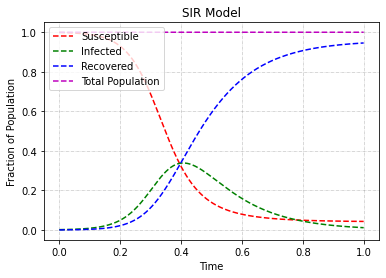

In [3]:
beta = 0.00218
alpha = 0.5
t_end = 16
step_size = 0.001
total_steps= int(t_end/step_size)+1 
susceptible = np.zeros(total_steps)
infected = np.zeros(total_steps)
recovered = np.zeros(total_steps)
total = np.zeros(total_steps)

N = 763
susceptible[0]=float(762)
infected[0]=float(1)
recovered[0] = float(0)
total[0] = N

for i in range(1,total_steps):
    susceptible[i] = susceptible[i-1] -beta*susceptible[i-1]*infected[i-1]*step_size
    infected[i] = infected[i-1] + (beta*susceptible[i-1]*infected[i-1] - alpha*infected[i-1])*step_size
    recovered[i] = recovered[i-1] + alpha*infected[i-1]*step_size
    total[i] = susceptible[i]+infected[i]+recovered[i]
    
x_axis=np.linspace(0,1,total_steps)

plt.figure(1)
plt.plot(x_axis,susceptible/N,'r--' )
plt.plot(x_axis,infected/N,'g--' )
plt.plot(x_axis,recovered/N,'b--' )
plt.plot(x_axis,total/N,'m--')

plt.title('SIR Model')
plt.ylabel('Fraction of Population')
plt.xlabel('Time')
plt.grid(b = True, color ='grey',  
        linestyle ='-.', linewidth = 0.5,  
        alpha = 0.6)
plt.legend(['Susceptible','Infected','Recovered','Total Population'], loc=2)
plt.show()


In [ ]:
import os
import numpy as np
from matplotlib import pyplot as plt
import numpy
import scipy
import pandas as pd


r0 = [0.9,0.95,1,1.05,1.1]
# r0 = [0.5]

alpha = 0.5
t_end = 200
step_size = 0.01
total_steps= int(t_end/step_size)+1 
susceptible = np.zeros(total_steps)
infected = np.zeros(total_steps)
recovered = np.zeros(total_steps)
total = np.zeros(total_steps)

N = 763
x_axis=np.linspace(0,t_end,total_steps)

for r in range(len(r0)):
        susceptible[0]=float(762)
        infected[0]=float(1)
        recovered[0] = float(0)
        total[0] = 1
        beta = float(r0[r])*alpha*N/susceptible[0]
        # print(beta)
        for i in range(1,total_steps):
                 susceptible[i] = (susceptible[i-1] -beta*susceptible[i-1]*infected[i-1]*step_size/N)
                 infected[i] = (infected[i-1] + (beta*susceptible[i-1]*infected[i-1]/N - alpha*infected[i-1])*step_size)
                 recovered[i] = (recovered[i-1] + alpha*infected[i-1]*step_size)
                 total[i] = susceptible[i]+infected[i]+recovered[i]
        plt.plot(x_axis,infected/N)
        print(np.argmax(infected))

#plt.figure(1)
#plt.plot(x_axis,susceptible/N,'r--' )
#plt.plot(x_axis,recovered/N,'b--' )
#plt.plot(x_axis,total/N,'m--')


plt.title('Varying Reprodution Number in SIR Model')
plt.ylabel('Fraction of Population who are infected')
plt.xlabel('Time')
plt.grid(b = True, color ='grey',  
         linestyle ='-.', linewidth = 0.5,  
         alpha = 0.6)
plt.legend(['r = 0.9','r = 0.95','r = 1','r = 1.05','r = 1.1'], loc=1)
plt.show()
